## Imports

In [2]:
import pandas as pd
import tensorflow.keras as keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

In [4]:
def plot_results(epochs, history, metric='mean_absolute_error'):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history['loss'], label='train_loss')
    sns.lineplot(x=range(epochs), y=history.history['val_loss'], label='val_loss')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history[metric], label=f'Train {metric}')
    sns.lineplot(x=range(epochs), y=history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.show()

## Daten einlesen

In [5]:
sales_all = pd.read_csv("../Datasets/sales_all.csv")

In [6]:
sales_all

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,False,False,107.0
1919,2017-04-03,0,Mon,False,False,113.0
1920,2017-04-04,1,Tue,False,False,87.0
1921,2017-04-05,2,Wed,False,False,69.0


## Plot

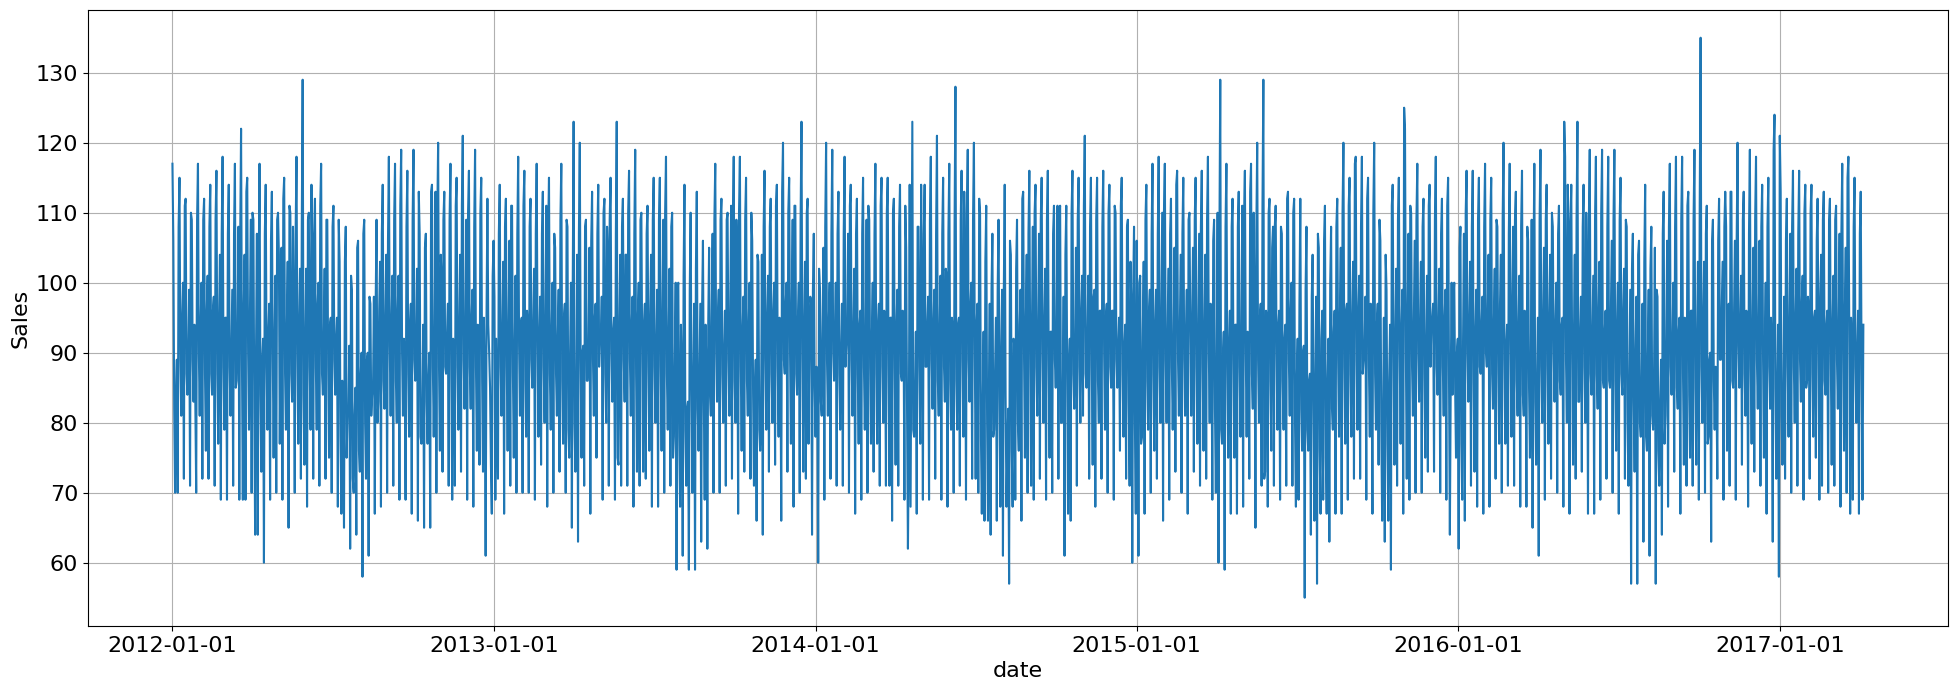

In [7]:
x_ticks = ['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
plt.figure(figsize=(24, 8))
sns.lineplot(data=sales_all, x="date", y="Sales")
plt.xticks(x_ticks)
plt.grid(True)
plt.show()

Wandeln Sie die Boolschen Features SchoolHoliday und Holiday in numerische Features um. Tipp: Benutzen Sie den LabelEncoder aus dem Vorschau Notebook dafür.

In [ ]:
# Code

Wandeln Sie die kategorischen Features in numerische Features um, mithilfe von One-Hot-Encoding und weißen Sie Features der Variable X und target der Variable y zu. Tipp: pd.get_dummies()

In [ ]:
X = # Code
y = # Code

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Bilden Sie nun ein Sequentielles Modell mit 1 Input-Layer, 2 Hidden-Layern und 1 Output-Layer.

In [ ]:
model = # Code

In [ ]:
LR = 5e-4
BATCHSIZE = 32
EPOCHS = 30

In [ ]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=LR), ##SGD = Stochastic Gradient Descent
    loss=keras.losses.MeanSquaredError(), ## Wird als Metrik für das Netzwerk verwendet um Error zu berechnen
    metrics=keras.losses.MeanAbsoluteError(), ## Nur für Monitoring, intern wird nichts mit diesem Wert gemacht
)

In [ ]:
model.summary()

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_split=0.2)

In [ ]:
plot_results(EPOCHS, history)

Schauen Sie sich die Evaluierung Ihrer Testdaten an und geben Sie eine kurze Beurteilung ab

In [ ]:
model.evaluate(X_test,y_test)